In [3]:
from BD_simulator import MC_BESQ_gateway, MC_Laguerre_gateway, exact_BESQ, exact_Laguerre, MC_dBESQ_gateway, MC_Laguerre
import numpy as np
import time
# J: Bessel function
from scipy.special import jv as J
# L: Laguerre polynomial
from scipy.special import  eval_laguerre as L
from math import comb
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

Test 1 : Bessel functions
Initial values:  [0, 1, 5, 10, 50]
Times:  [1, 2, 5, 10, 50]


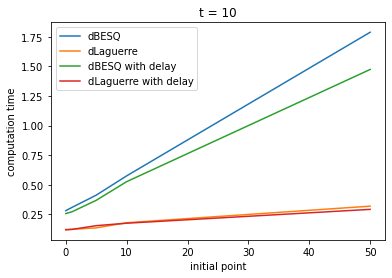

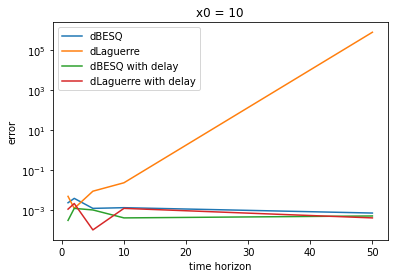

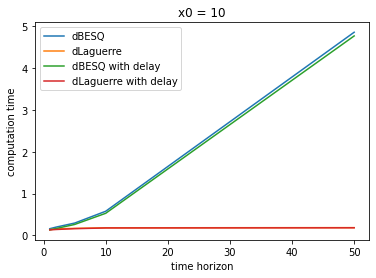

In [4]:
testno = 0
# TEST: BESQ processes - (reparametrized) Bessel functions
# Methods: dBESQ simulation, dLaguerre simulation, dBESQ with delay, dLaguerre with delay, exact BESQ
testno += 1
num_paths = 10**5
x0_array = [0, 1, 5, 10, 50]
# times = [0, 0.2, 0.5, 1, 2, 5]
times = [1, 2, 5, 10, 50]
np.random.seed(0)

print('Test', testno, ': Bessel functions')
print('Initial values: ', x0_array)
print('Times: ', times)

dBESQ_errors, dBESQ_time = [], []
dLaguerre_errors, dLaguerre_time = [], []
dBESQdelay_errors, dBESQdelay_time = [], []
dLaguerredelay_errors, dLaguerredelay_time = [], []

for t in times:
    dBESQ_e, dBESQ_t = [], []
    dLaguerre_e, dLaguerre_t = [], []
    dBESQdelay_e, dBESQdelay_t = [], []
    dLaguerredelay_e, dLaguerredelay_t = [], []
    
    for x0 in x0_array:
        BESQ_value = exact_BESQ(t = t, x0 = x0)
        
        start = time.time()
        dBESQ_estimate = MC_BESQ_gateway(N = num_paths, t = t, x0 = x0, test = 'bessel', method = 'bessel')
        ctime = time.time() - start
        dBESQ_e.append(abs(dBESQ_estimate - BESQ_value))
        dBESQ_t.append(ctime)
        
        start = time.time()
        dLaguerre_estimate = MC_BESQ_gateway(N = num_paths, t = t, x0 = x0, test = 'bessel', method = 'laguerre')
        ctime = time.time() - start
        dLaguerre_e.append(abs(dLaguerre_estimate - BESQ_value))
        dLaguerre_t.append(ctime)
        
        start = time.time()
        dBESQdelay_estimate = MC_BESQ_gateway(N = num_paths, t = t, x0 = x0, test = 'bessel', method = 'bessel-delay')
        ctime = time.time() - start
        dBESQdelay_e.append(abs(dBESQdelay_estimate - BESQ_value))
        dBESQdelay_t.append(ctime)
        
        start = time.time()
        dLaguerredelay_estimate = MC_BESQ_gateway(N = num_paths, t = t, x0 = x0, test = 'bessel', method = 'laguerre-delay')
        ctime = time.time() - start
        dLaguerredelay_e.append(abs(dLaguerredelay_estimate - BESQ_value))
        dLaguerredelay_t.append(ctime)
    
    dBESQ_errors.append(dBESQ_e)
    dBESQ_time.append(dBESQ_t)
    dLaguerre_errors.append(dLaguerre_e)
    dLaguerre_time.append(dLaguerre_t)
    dBESQdelay_errors.append(dBESQdelay_e)
    dBESQdelay_time.append(dBESQdelay_t)
    dLaguerredelay_errors.append(dLaguerredelay_e)
    dLaguerredelay_time.append(dLaguerredelay_t)

dBESQ_errors = np.asarray(dBESQ_errors)
dBESQ_time = np.asarray(dBESQ_time)
dLaguerre_errors = np.asarray(dLaguerre_errors)
dLaguerre_time = np.asarray(dLaguerre_time)
dBESQdelay_errors = np.asarray(dBESQdelay_errors)
dBESQdelay_time = np.asarray(dBESQdelay_time)
dLaguerredelay_errors = np.asarray(dLaguerredelay_errors)
dLaguerredelay_time = np.asarray(dLaguerredelay_time)

for i in [3]:
#     plt.figure()
#     plt.xlabel('initial point')
#     plt.ylabel('error')
#     plt.plot(x0_array, dBESQ_errors[i], label='dBESQ')
#     plt.plot(x0_array, dLaguerre_errors[i], label='dLaguerre')
#     plt.plot(x0_array, dBESQdelay_errors[i], label='dBESQ with delay')
#     plt.plot(x0_array, dLaguerredelay_errors[i], label='dLaguerre with delay')
#     plt.yscale('log')
#     plt.title('t = ' + str(times[i]))
#     plt.legend()

    plt.figure()
    plt.xlabel('initial point')
    plt.ylabel('computation time')
    plt.plot(x0_array, dBESQ_time[i], label='dBESQ')
    plt.plot(x0_array, dLaguerre_time[i], label='dLaguerre')
    plt.plot(x0_array, dBESQdelay_time[i], label='dBESQ with delay')
    plt.plot(x0_array, dLaguerredelay_time[i], label='dLaguerre with delay')
    plt.title('t = ' + str(times[i]))
    plt.legend()

for i in [3]:
    plt.figure()
    plt.xlabel('time horizon')
    plt.ylabel('error')
    plt.plot(times, dBESQ_errors[:,i], label='dBESQ')
    plt.plot(times, dLaguerre_errors[:,i], label='dLaguerre')
    plt.plot(times, dBESQdelay_errors[:,i], label='dBESQ with delay')
    plt.plot(times, dLaguerredelay_errors[:,i], label='dLaguerre with delay')
    plt.yscale('log')
    plt.title('x0 = ' + str(x0_array[i]))
    plt.legend()

    plt.figure()
    plt.xlabel('time horizon')
    plt.ylabel('computation time')
    plt.plot(times, dBESQ_time[:,i], label='dBESQ')
    plt.plot(times, dLaguerre_time[:,i], label='dLaguerre')
    plt.plot(times, dBESQdelay_time[:,i], label='dBESQ with delay')
    plt.plot(times, dLaguerredelay_time[:,i], label='dLaguerre with delay')
    plt.title('x0 = ' + str(x0_array[i]))
    plt.legend()

plt.show()


# fig, ax = plt.subplots()
# ax.set_xlabel('time horizon')
# ax.set_ylabel('error')
# ln1 = ax.plot(times, dBESQ_errors[0], label='dBESQ errors')
# ln2 = ax.plot(times, dLaguerre_errors[0], label='dLaguerre errors')
# ln3 = ax.plot(times, dBESQdelay_errors[0], label='dBESQdelay errors')
# ln4 = ax.plot(times, dLaguerredelay_errors[0], label='dLaguerredelay errors')

# ax2=ax.twinx()
# ax2.set_ylabel('computation time')
# ln5 = ax2.plot(times, dBESQ_time[0], label='dBESQ time', linestyle='dashed')
# ln6 = ax2.plot(times, dLaguerre_time[0], label='dLaguerre time', linestyle='dashed')
# ln7 = ax2.plot(times, dBESQdelay_time[0], label='dBESQdelay time', linestyle='dashed')
# ln8 = ax2.plot(times, dLaguerredelay_time[0], label='dLaguerredelay time', linestyle='dashed')

# lns = ln1 + ln2 + ln3 + ln4 + ln5 + ln6 + ln7 + ln8
# labels = [l.get_label() for l in lns]
# plt.legend(lns, labels)


# print('\nErrors of dBESQ simulation:')
# print(dBESQ_errors)
# print('\nErrors of dLaguerre simulation:')
# print(dLaguerre_errors)
# print('\nErrors of dBESQ simulation with delay:')
# print(dBESQdelay_errors)
# print('\nErrors of dLaguerre simulation with delay:')
# print(dLaguerredelay_errors) 

# print('\nComputation time of dBESQ simulation:')
# print(dBESQ_time)
# print('\nComputation time dLaguerre simulation:')
# print(dLaguerre_time)
# print('\nComputation time of dBESQ simulation with delay:')
# print(dBESQdelay_time)
# print('\nComputation time of dLaguerre simulation with delay:')
# print(dLaguerredelay_time)

In [2]:
# TEST: Laguerre processes - Laguerre functions
# Methods: dLaguerre simulation, dLaguerre with delay, exact Laguerre
testno += 1
n = 1
num_paths = 10**5
x0_array = range(10)
times = [1, 1.2, 1.5, 2, 5]
np.random.seed(0)

print('Test', testno, ': Laguerre functions with degree', n)
print('Initial values: ', x0_array)
print('Times: ', times)
print('\nComputation time:')

start = time.time()
dLaguerre_estimates = [[MC_Laguerre_gateway(N = num_paths, t = t, x0 = x0, test = 'laguerre', method = 'laguerre', args = {'n': n}) 
                    for x0 in x0_array] for t in times]
time1 = time.time() - start
print(time1)

start = time.time()
dLaguerredelay_estimates = [[MC_Laguerre_gateway(N = num_paths, t = t, x0 = x0, test = 'laguerre', method = 'laguerre-delay', args = {'n': n}) 
                         for x0 in x0_array] for t in times]
time2 = time.time() - start
print(time2)

Laguerre_values = [[exact_Laguerre(t = t, x0 = x0, n = n) for x0 in x0_array] for t in times]

print('\nEstimates from dLaguerre simulation:')
print(dLaguerre_estimates)
print('\nEstimates from dLaguerre simulation with delay:')
print(dLaguerredelay_estimates)
print('\nExact Laguerre computation:')
print(Laguerre_values)

print('\nErrors of dLaguerre simulation:')
print(np.asarray(dLaguerre_estimates) - np.asarray(Laguerre_values))
print('\nErrors of dLaguerre simulation with delay:')
print(np.asarray(dLaguerredelay_estimates) - np.asarray(Laguerre_values))

NameError: name 'np' is not defined

In [4]:
# TEST: Laguerre processes - RELU function
# Methods: dLaguerre with delay, Brownian motion simulation
testno += 1
num_paths = 10**5
x0_array = range(10)
times = [1, 1.2, 1.5, 2, 5]
np.random.seed(0)

print('Test', testno, ': RELU function')
print('Initial values: ', x0_array)
print('Times: ', times)
print('\nComputation time:')

start = time.time()
dLaguerredelay_estimates = [[MC_Laguerre_gateway(N = num_paths, t = t, x0 = x0, test = 'relu', method = 'laguerre-delay')
                             for x0 in x0_array] for t in times]
time1 = time.time() - start
print(time1)

num_paths *= 10
start = time.time()
Laguerre_estimates = [[MC_Laguerre(N = num_paths, t = t, x0 = x0, test = 'relu')
                       for x0 in x0_array] for t in times]
time2 = time.time() - start
print(time2)

print('\nEstimates from dLaguerre simulation with delay:')
print(dLaguerredelay_estimates)
print('\nEstimates from Brownian motion simulation:')
print(Laguerre_estimates)

print('\nErrors of dLaguerre simulation with delay:')
print(np.asarray(dLaguerredelay_estimates) - np.asarray(Laguerre_estimates))

Test 3 : RELU function
Initial values:  range(0, 10)
Times:  [1, 1.2, 1.5, 2, 5]

Computation time:
6.460314035415649
4.433940172195435

Estimates from dLaguerre simulation with delay:
[[0.6311, 0.9958, 1.3709, 1.7417, 2.1049, 2.4805, 2.8518, 3.2206, 3.5831, 3.9716], [0.6929, 0.9984, 1.3088, 1.6101, 1.9178, 2.2127, 2.5228, 2.8218, 3.1193, 3.4341], [0.7664, 1.0064, 1.2272, 1.4504, 1.6677, 1.9035, 2.1269, 2.3627, 2.5667, 2.7969], [0.8625, 1.0035, 1.1375, 1.2755, 1.4118, 1.5415, 1.6747, 1.8227, 1.9615, 2.0797], [0.9901, 0.9993, 1.0035, 1.0103, 1.0173, 1.0177, 1.0313, 1.0383, 1.0501, 1.0528]]

Estimates from Brownian motion simulation:
[[0.6313, 1.001, 1.3685, 1.7368, 2.1027, 2.4715, 2.8386, 3.2065, 3.5731, 3.9406], [0.6995, 0.9997, 1.2992, 1.6019, 1.9019, 2.207, 2.5081, 2.8056, 3.1092, 3.4094], [0.7768, 1.0017, 1.225, 1.4444, 1.6698, 1.8916, 2.113, 2.3361, 2.5634, 2.7849], [0.8642, 1.0, 1.1374, 1.2729, 1.4064, 1.5393, 1.6794, 1.8147, 1.9471, 2.0795], [0.9923, 0.9999, 1.0074, 1.0144, 1.020

In [5]:
# TEST: dBESQ processes - Laguerre functions
# Methods: birth-death simulation, dLaguerre simulation, exact BESQ
testno += 1
num_paths = 10**5
n0_array = range(10)
times = [2, 5, 10, 20, 50]
np.random.seed(0)

print('Test', testno, ': Laguerre functions evaluated at', 1)
print('Initial values: ', n0_array)
print('Times: ', times)
print('\nComputation time:')

start = time.time()
bd_estimates = [[MC_dBESQ_gateway(N = num_paths, t = t, n0 = n0, test = 'laguerre', method = 'birth-death')
                 for n0 in n0_array] for t in times]
time1 = time.time() - start
print(time1)

start = time.time()
dLaguerre_estimates = [[MC_dBESQ_gateway(N = num_paths, t = t, n0 = n0, test = 'laguerre', method = 'laguerre')
                        for n0 in n0_array] for t in times]
time2 = time.time() - start
print(time2)

start = time.time()
besq_estimates = [[MC_dBESQ_gateway(N = num_paths, t = t, n0 = n0, test = 'laguerre', method = 'exact-besq')
                   for n0 in n0_array] for t in times]
time3 = time.time() - start
print(time3)

print('\nEstimates from birth-death simulation:')
print(bd_estimates)
print('\nEstimates from dLaguerre simulation:')
print(dLaguerre_estimates)
print('\nEstimates from exact BESQ:')
print(besq_estimates)

print('\nErrors of birth-death simulation:')
print(np.asarray(bd_estimates) - np.asarray(besq_estimates))
print('\nErrors of dLaguerre simulation:')
print(np.asarray(dLaguerre_estimates) - np.asarray(besq_estimates))

Test 4 : Laguerre functions evaluated at 1
Initial values:  range(0, 10)
Times:  [2, 5, 10, 20, 50]

Computation time:
55.889060974121094
25.169286966323853
0.0013499259948730469

Estimates from birth-death simulation:
[[0.1399, 0.0014, -0.0678, -0.0928, -0.0809, -0.0628, -0.0351, -0.0036, 0.0214, 0.0425], [0.016, 0.0045, -0.0012, -0.0014, -0.0046, -0.0023, -0.0006, -0.0022, 0.0032, 0.0038], [0.0018, 0.0017, 0.0004, 0.0002, 0.0008, 0.0012, 0.0036, 0.0011, -0.0005, 0.0007], [-0.001, -0.0002, 0.0014, 0.0001, -0.0008, 0.0012, -0.0012, -0.0005, -0.0005, 0.0025], [-0.0001, -0.0013, -0.0004, -0.0002, 0.0017, 0.0006, -0.0004, -0.0007, 0.0002, -0.0004]]

Estimates from dLaguerre simulation:
[[0.1344, 0.0021, -0.0684, -0.0907, -0.0861, -0.0645, -0.0355, -0.0058, 0.0199, 0.0427], [0.0089, 0.0011, -0.0052, -0.0048, -0.0038, -0.0012, -0.0005, -0.0025, 0.0032, 0.0013], [0.0011, -0.0003, 0.0008, -0.001, 0.0011, -0.0004, -0.0004, -0.002, -0.0, 0.0029], [-0.0013, -0.001, 0.0007, -0.0017, -0.0001, 0.00

In [ ]:
# TEST: polynomials
# Methods: dBESQ simulation, dLaguerre simulation
# testno += 1
# nrounds = 1
# degree = 3
# np.random.seed(1)
# for i in range(nrounds):
#     coeff = np.random.standard_normal(degree+1)
#     dBESQ_estimates_poly = [[MC_BESQ_gateway(N = num_paths, t = t, x0 = x0, test = 'poly', args = [coeff]) for x0 in x0_array] for t in times]
#     dLaguerre_estimates_poly = [[MC_BESQviaLaguerre_gateway(N = num_paths, t = t, x0 = x0, test = 'poly', args = [coeff]) for x0 in x0_array] for t in times]
# print('Test ', testno, ': Polynomials')
# print('Initial values: ', x0_array)
# print('Times: ', times)
# print('Estimates from dBESQ simulation:')
# print(dBESQ_estimates_poly)
# print('Estimates from dLaguerre simulation:')
# print(dLaguerre_estimates_poly)
    

# x0 = 1
# coef = [0, 1]
# t = 0.1
# # print(MC_BESQ_gateway(N = 10**4, t = t, x0 = x0, test = 'bessel'))
# # print(MC_BESQviaLaguerre_gateway(N = 10**4, t = t, x0 = x0, test = 'bessel')
# print(exact_BESQ(t = t, x0 = x0))
# print(MC_BESQ_hankel(N = 10**3, t = t, x0 = x0, test = 'poly', args = [coef]))
# # print(hankel_modified(np.random.exponential(t), lambda x : np.sqrt(x)))